# Двоичные деревья

__Бинарное дерево__ — дерево, каждый узел которого имеет не более двух потомков.

Бинарные деревья используют в информатике, чтобы определить значение арифметического выражения. Например, необходимо определить значение выражения: (2а + с) – 4b. Листья в этом случае — числа и переменные, а узлы — арифметические действия.

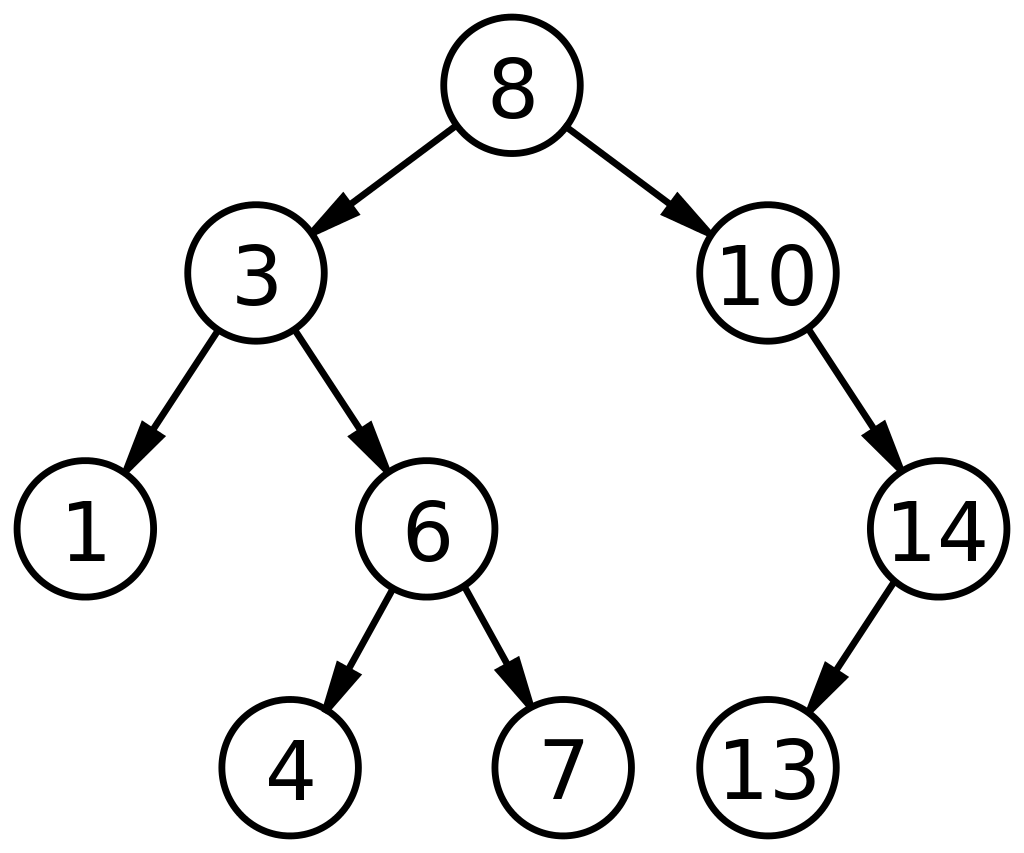

### Проверка идентичности двух бинарных деревьев

Идея состоит в том, чтобы обойти оба дерева и сравнить значения в их корневом узле. Если значение совпадает, рекурсивно проверьте, идентично ли левое поддерево первого дерева левому поддереву второго дерева, а правое поддерево первого дерева идентично правому поддереву второго дерева. Если значение в их корневом узле отличается, деревья нарушают свойство данных. Если в какой-то момент рекурсии первое дерево пусто, а второе дерево непусто, или второе дерево пусто, а первое дерево непусто, деревья нарушают структурное свойство и не могут быть идентичными.

#### Рекурсивное решение

In [1]:
# Класс для хранения узла бинарного дерева.
class Node:
    def __init__(self, key=None, left=None, right=None):
        self.key = key
        self.left = left
        self.right = right
 
 
# Рекурсивная функция для проверки идентичности двух заданных бинарных деревьев.
def isIdentical(x, y):
 
    #, если оба дерева пусты, вернуть true
    if x is None and y is None:
        return True
 
    #, если оба дерева непусты и значение их корневого узла совпадает,
    # повторяются для их левого и правого поддерева
    return (x is not None and y is not None) and (x.key == y.key) and \
        isIdentical(x.left, y.left) and isIdentical(x.right, y.right)

In [4]:
# построить первое дерево
x = Node(15)
x.left = Node(10)
x.right = Node(20)
x.left.left = Node(8)
x.left.right = Node(12)
x.right.left = Node(16)
x.right.right = Node(25)

# построить второе дерево
y = Node(15)
y.left = Node(10)
y.right = Node(8)
y.left.left = Node(20)
y.left.right = Node(12)
y.right.left = Node(16)
y.right.right = Node(25)

if isIdentical(x, y):
    print('The given binary trees are identical')
else:
    print('The given binary trees are not identical')

The given binary trees are not identical


#### Итеративное решение

In [6]:
from collections import deque
 
# Класс для хранения узла бинарного дерева.
class Node:
    def __init__(self, key=None, left=None, right=None):
        self.key = key
        self.left = left
        self.right = right
 
 
# Итеративная функция для проверки идентичности двух заданных бинарных деревьев.
def isIdentical(x, y):
 
    #, если оба дерева пусты, вернуть true
    if x is None and y is None:
        return True
 
    #, если первое дерево пусто (и второе дерево непусто), вернуть false
    elif x is None:
        return False
 
    #, если второе дерево пусто (и первое дерево непусто), вернуть false
    elif y is None:
        return False
 
    # создает stack для хранения пар
    stack = deque()
    stack.append((x, y))
 
    # Цикл # до тех пор, пока stack не станет пустым
    while stack:
        # извлекает верхнюю пару из stack и обрабатывает ее
        x, y = stack.pop()
 
        #, если значение их корневого узла не совпадает, вернуть false
        if x.key != y.key:
            return False
 
        #, если существует левое поддерево `x` и `y`, передать их адреса
        # в stack; в противном случае верните false, если существует только один левый дочерний элемент
        if (x.left is not None) and (y.left is not None):
            stack.append((x.left, y.left))
        elif x.left or y.left:
            return False
 
        #, если существует правое поддерево `x` и `y`, передать их адреса
        # в stack; в противном случае верните false, если существует только один правильный дочерний элемент
        if x.right and y.right:
            stack.append((x.right, y.right))
        elif x.right or y.right:
            return False
 
    # мы достигаем здесь, если оба бинарных дерева идентичны
    return True
 


In [ ]:

# построить первое дерево
x = Node(15)
x.left = Node(10)
x.right = Node(20)
x.left.left = Node(8)
x.left.right = Node(12)
x.right.left = Node(16)
x.right.right = Node(25)

# построить второе дерево
y = Node(15)
y.left = Node(10)
y.right = Node(20)
y.left.left = Node(8)
y.left.right = Node(16)
y.right.left = Node(12)
y.right.right = Node(25)

if isIdentical(x, y):
    print('The given binary trees are identical')
else:
    print('The given binary trees are not identical')

The given binary trees are not identical


# Куча

Куча представляет собой специализированную древовидную структуру данных, которая удовлетворяет свойству кучи: если A является родительским узлом B, то ключ (значение) узла A упорядочена по ключу узла B с тем же порядком, применяемым по всей куче.

Куча — это одна из максимально эффективных реализаций абстрактного типа данных, называемого приоритетная очередь, и на самом деле приоритетные очереди часто называют “кучами”, независимо от того, как они могут быть реализованы. Распространенной реализацией кучи является двоичная куча, в которой дерево является полным двоичным деревом.

# Зачем?

Рассмотрим структуру данных, которая поддерживает следующие операции:

-  Добавить элемент в структуру данных.
-  Извлечь из структуры данных наибольший (или наименьший) элемент. Извлеченный элемент удаляется из структуры.
В структуре могут храниться одинаковые элементы.

Если реализовать такую структуру на базе списка, то добавлять элементы можно в конец списка за $O(?)$. Но поиск наибольшего элемента для списка длины $n$ - будет занимать $O(?)$.

Если же хранить элементы в списке упорядочив их по неубыванию, то извлечение наибольшего будет занимать $O(?)$, но добавление элемента в список (т.е. сдвиг элементов, уже находящихся в списке) - $O(?)$.

Специальная структура данных «Куча» (англ. heap) позволяет эти операции выполнять за $O(\log n)$.

В куче элементы хранятся в виде двоичного дерева:
- у элементов есть два потомка - левый и правый. 
- в вершине кучи - один элемент с 2 потомками 

Уровни заполняются в порядке увеличения номера уровня, а сам уровень заполняется **слева направо**. У элементов последнего уровня нет ни одного потомка, возможно, что и у некоторых элементов предпоследнего уровня нет потомков. 

Также в куче может быть один элемент, у которого только один потомок (левый).

При этом для элементов кучи верно следующее свойство 

**каждый из элементов кучи больше или равен всех своих потомков** (max heap) 

либо 

**каждый из элементов кучи меньше или равен всех своих потомков** (min heap). 
В частности это означает, что в вершине кучи хранится наибольший (наименьший) элемент.

На картинке приведен пример правильной кучи из 9 элементов.

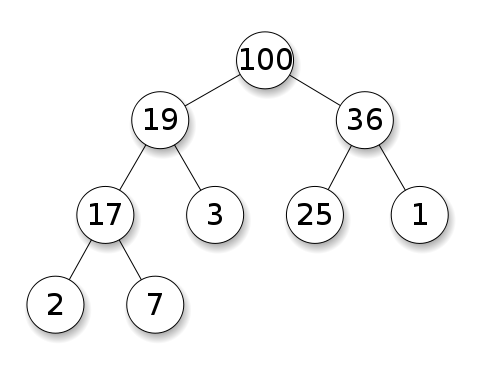

In [2]:
import sys 
  
class MinHeap: 
  
    def __init__(self, maxsize): 
        self.maxsize = maxsize 
        self.size = 0
        self.Heap = [0] * (self.maxsize + 1) 
        self.Heap[0] = -1 * 1e10 # or sys.maxsize
        self.FRONT = 1
  
    def parent(self, pos): 
        return pos // 2
  
    def leftChild(self, pos): 
        return 2 * pos 
  
    def rightChild(self, pos): 
        return (2 * pos) + 1
  
    def isLeaf(self, pos): 
        return pos * 2 > self.size 
  
    def swap(self, fpos, spos): 
        self.Heap[fpos], self.Heap[spos] = self.Heap[spos], self.Heap[fpos] 
  
    def minHeap(self):
        for pos in range(self.size//2, 0, -1): 
            self.minHeapify(pos) 
    
    def minHeapify(self, pos):
        if not self.isLeaf(pos): 
            if (self.Heap[pos] > self.Heap[self.leftChild(pos)] or 
               self.Heap[pos] > self.Heap[self.rightChild(pos)]):
                if self.Heap[self.leftChild(pos)] < self.Heap[self.rightChild(pos)]: 
                    self.swap(pos, self.leftChild(pos)) 
                    self.minHeapify(self.leftChild(pos)) 
                else: 
                    self.swap(pos, self.rightChild(pos)) 
                    self.minHeapify(self.rightChild(pos)) 
  
    def insert(self, element): 
        if self.size >= self.maxsize : 
            return
        self.size += 1
        self.Heap[self.size] = element 
        current = self.size 
        while self.Heap[current] < self.Heap[self.parent(current)]: 
            self.swap(current, self.parent(current)) 
            current = self.parent(current) 
  
    def print_heap(self): 
        for i in range(1, (self.size // 2) + 1): 
            print(" PARENT : " + str(self.Heap[i]) + " LEFT CHILD : " + 
                                str(self.Heap[2 * i]) + " RIGHT CHILD : " +
                                str(self.Heap[2 * i + 1])) 
  
    
    def remove_head(self): 
  
        popped = self.Heap[self.FRONT] 
        self.Heap[self.FRONT] = self.Heap[self.size] 
        self.size-= 1
        self.minHeapify(self.FRONT) 
        return popped 

In [3]:
print('The minHeap is ') 
minHeap = MinHeap(15) 
minHeap.insert(5) 
minHeap.insert(3) 
minHeap.insert(17) 
minHeap.insert(10) 
minHeap.insert(84) 
minHeap.insert(19) 
minHeap.insert(6) 
minHeap.insert(22) 
minHeap.insert(9) 
minHeap.minHeap() 

minHeap.print_heap() 
print(f"The Min val is {minHeap.remove_head()}")

The minHeap is 
 PARENT : 3 LEFT CHILD : 5 RIGHT CHILD : 6
 PARENT : 5 LEFT CHILD : 9 RIGHT CHILD : 84
 PARENT : 6 LEFT CHILD : 19 RIGHT CHILD : 17
 PARENT : 9 LEFT CHILD : 22 RIGHT CHILD : 10
The Min val is 3


## Задачи

1. Для заданного бинарного дерева напишите эффективный алгоритм, проверяющий, имеет ли оно симметричную структуру или нет, т. е. левое и правое поддерево зеркально отражают друг друга.

2. Проверьте, представляет ли массив введённый с клавиатуры список минимальную кучу или нет. 
Если да, то выведите 1, если нет - 0.

3. В этой задаче вам даётся три списка студентов:
- владеющих французским языком
- умеющих плавать
- владеющих игрой на фортепиано
Вам необходимо определить список пловцов-пианистов, не владеющих французским.
Формат входных данных
Три строки. В каждой через пробел записаны номера зачёток студентов. Первая строка посвящена владеющим французским, вторая пловцам и третья пианистам.

Формат выходных данных: Одна строка c номерами зачёток через пробел по возрастанию.

Примеры:

Ввод данных:

1 2 5 7 8 9

3 4 8 2 10

10 3 2 8 5

Вывод данных:

3 10

4. Дано бинарное дерево. Напишите эффективный алгоритм преобразования бинарного дерева в его зеркало.
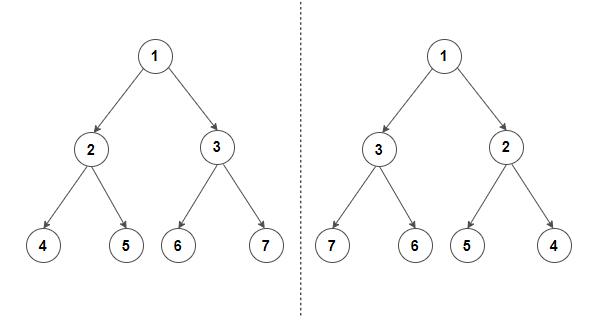

5. Для заданного бинарного дерева найти в нем всех предков данного узла.

6. Реализуйте алгоритм сортировки кучей. На вход подаётся неотсортированный список, на выходе должен получиться отсортированные список.

Формат входных данных:

6 4 7 1 9 -2

Формат выходных данных:

-2 1 4 6 7 9